In [16]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

plt.style.use("Mod/mystyle.mplstyle")

In [17]:
Set_scelto = 0

In [18]:
excel_data = pd.read_excel(
    "Data/Misure effettuate.xlsx", sheet_name="Sheet2", header=None
).T

frequenze = [461, 693, 924, 1155, 1385]

excel_data

,0,1,2,3,4,5,6,7,8,9
0,15.5,2.80,9.6,2.08,9.9,2.24,7.5,2.48,7.8,1.36
1,19.1,1.52,21.0,1.04,11.2,1.36,9.1,1.36,8.3,0.96
2,20.5,0.88,23.3,0.72,12.1,0.64,9.4,1.12,8.4,0.88
3,21.3,0.64,24.3,0.56,12.3,0.56,10.1,0.64,8.6,0.80
4,21.4,0.56,25.0,0.48,12.8,0.72,10.3,0.56,8.8,0.64
...,...,...,...,...,...,...,...,...,...,...
69,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
70,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
71,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
72,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00


In [19]:
def fit_sin(x, a, b, c, d):
    return a * abs(np.sin(b * (x - c))) + d

Parameters: [ 5.87619468  0.08342002 21.16095715  0.38867174]
lambda 0.753198706070185
347.2246034983553
Parameters: [ 1.71349694  0.08982224 -9.75266257  0.43254854]
lambda 0.699513286069666
484.7627072462785
Parameters: [ 1.57586221  0.12160239 -4.10481849  0.6       ]
lambda 0.5166991828946526
477.43004499465894
Parameters: [ 3.43702012  0.21007932 10.43398451  0.4306957 ]
lambda 0.29908633444284727
345.4447162814886
Parameters: [  0.79341303   0.12928347 -13.32151416   0.6       ]
lambda 0.48600066597237884
673.1109223717447


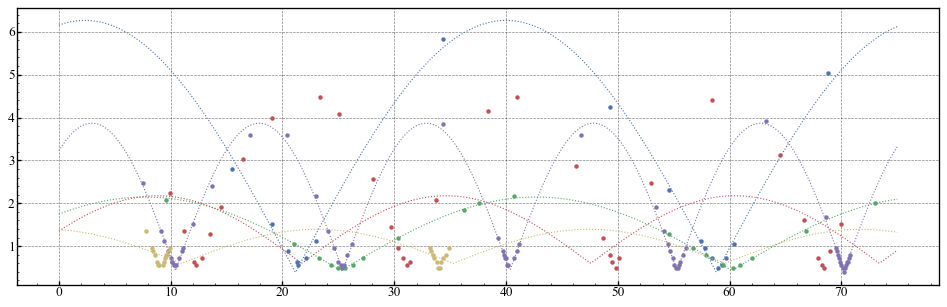

In [20]:
plt.figure(figsize=(12, 4))

for Set_scelto in range(5):
    posizioni = excel_data.iloc[:, 2 * Set_scelto]
    posizioni = posizioni[posizioni != 0].to_numpy()
    ampiezze = excel_data.iloc[:, 2 * Set_scelto + 1]
    ampiezze = ampiezze[ampiezze != 0].to_numpy()

    plt.scatter(posizioni, ampiezze)
    # plt.xlim([0, 73])

    params, cov = scipy.optimize.curve_fit(
        fit_sin,
        posizioni,
        ampiezze,
        p0=[20 / (Set_scelto + 1), 0.04 * (Set_scelto + 2), np.pi / 2, 0.5],
        bounds=((0, 0, -10 * np.pi, 0.3), (np.inf, np.inf, 10 * np.pi, 0.6)),
        maxfev=10000,
    )
    x = np.linspace(0, 75, 1000)
    plt.plot(x, fit_sin(x, *params), ls=":")

    Lambda = 2 * np.pi / params[1] / 100
    print("Parameters:", params)
    print("lambda", Lambda)
    print(Lambda * frequenze[Set_scelto])

plt.savefig("boiadeh.png")